In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


In [17]:


df_customers = pd.read_csv("data_2/customers_dataset.csv", sep=",")
df_geolocation = pd.read_csv("data_2/geolocation_dataset.csv", sep=",")
df_order_items = pd.read_csv("data_2/order_items_dataset.csv", sep=",")
df_order_payments = pd.read_csv("data_2/order_payments_dataset.csv", sep=",")
df_order_review = pd.read_csv("data_2/order_review_dataset_clean.csv", sep=",")
df_order = pd.read_csv("data_2/orders_dataset.csv", sep=",")
df_product_categor_name = pd.read_csv("data_2/product_category_name_translation.csv", sep=",")
df_products = pd.read_csv("data_2/products_dataset.csv", sep=",")
df_sellers = pd.read_csv("data_2/sellers_dataset.csv", sep=",")
df_state_name = pd.read_csv("data_2/state_name.csv", sep=",")


In [18]:
#using order_payments and order_purchase_timestamp
df_order_payments.shape
df_order_payments.columns



Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [19]:
df_order_payments.drop(['payment_sequential','payment_type', 'payment_installments', 'payment_value'], axis=1)

,order_id
0,b81ef226f3fe1789b1e8b2acac839d17
1,a9810da82917af2d9aefd1278f1dcfa0
2,25e8ea4e93396b6fa0d3dd708e76c1bd
3,ba78997921bbcdc1373bb41e913ab953
4,42fdf880ba16b47b59251dd489d4441a
...,...
103881,0406037ad97740d563a178ecc7a2075c
103882,7b905861d7c825891d6347454ea7863f
103883,32609bbb3dd69b3c066a6860554a77bf
103884,b8b61059626efa996a60be9bb9320e10


In [20]:
df_order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [21]:

df_order_items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [22]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
df_order_items = pd.read_csv("data_2/order_items_dataset.csv", index_col="order_id", parse_dates=True)

C:\Users\JoJo_\AppData\Local\Temp\ipykernel_13808\2545460787.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_order_items = pd.read_csv("data_2/order_items_dataset.csv", index_col="order_id", parse_dates=True)


In [24]:
df_order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


<Axes: xlabel='order_id'>

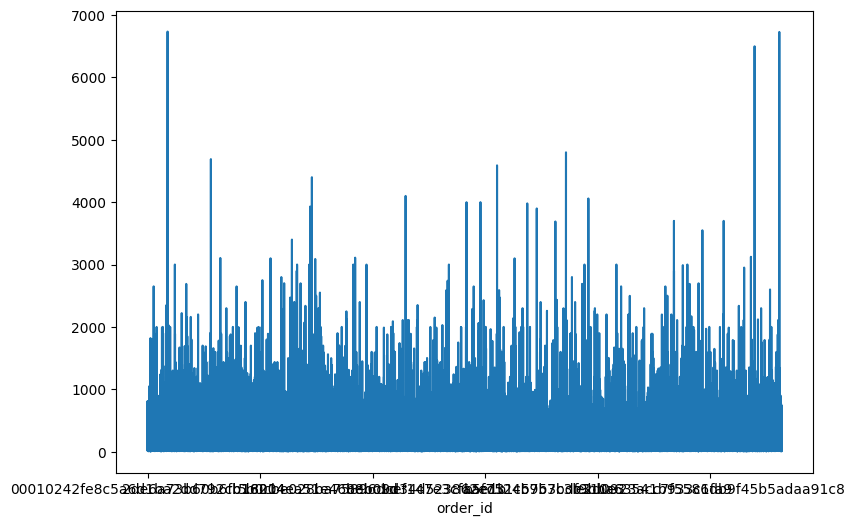

In [25]:
df_order_items['price'].plot(figsize=(9, 6))


In [26]:
df_order_items.index


Index(['00010242fe8c5a6d1ba2dd792cb16214', '00018f77f2f0320c557190d7a144bdd3',
       '000229ec398224ef6ca0657da4fc703e', '00024acbcdf0a6daa1e931b038114c75',
       '00042b26cf59d7ce69dfabb4e55b4fd9', '00048cc3ae777c65dbb7d2a0634bc1ea',
       '00054e8431b9d7675808bcb819fb4a32', '000576fe39319847cbb9d288c5617fa6',
       '0005a1a1728c9d785b8e2b08b904576c', '0005f50442cb953dcd1d21e1fb923495',
       ...
       'fffb9224b6fc7c43ebb0904318b10b5f', 'fffb9224b6fc7c43ebb0904318b10b5f',
       'fffb9224b6fc7c43ebb0904318b10b5f', 'fffb9224b6fc7c43ebb0904318b10b5f',
       'fffbee3b5462987e66fb49b1c5411df2', 'fffc94f6ce00a00581880bf54a75a037',
       'fffcd46ef2263f404302a634eb57f7eb', 'fffce4705a9662cd70adb13d4a31832d',
       'fffe18544ffabc95dfada21779c9644f', 'fffe41c64501cc87c801fd61db3f6244'],
      dtype='object', name='order_id', length=112650)

In [27]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


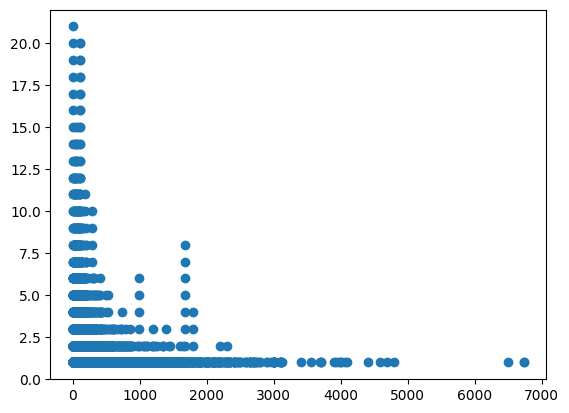

In [28]:
plt.scatter(df_order_items['price'],df_order_items['order_item_id'])

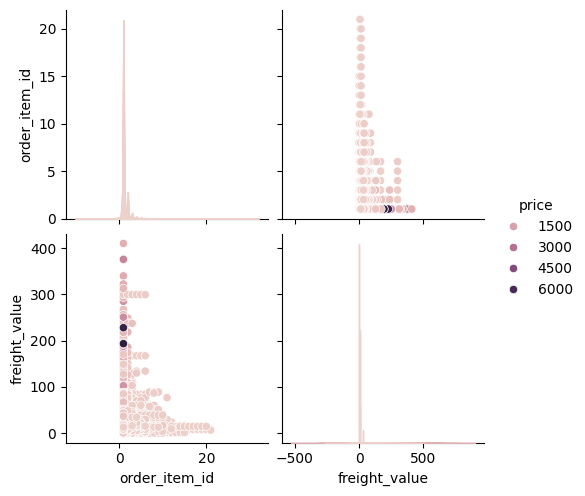

In [29]:
sns.pairplot(df_order_items, hue='price')

In [30]:
df_customers.head()

,"customer_id""",customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


<Axes: ylabel='Frequency'>

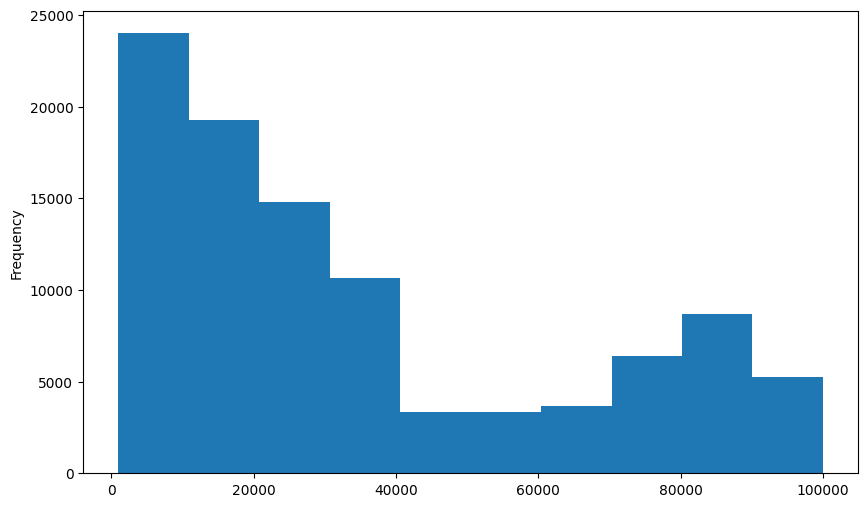

In [72]:
df_customers['customer_zip_code_prefix'].plot(kind='hist', figsize=(10,6))

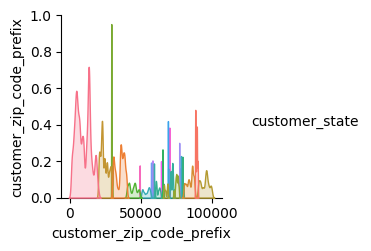

In [41]:
sns.pairplot(df_customers, hue='customer_state')

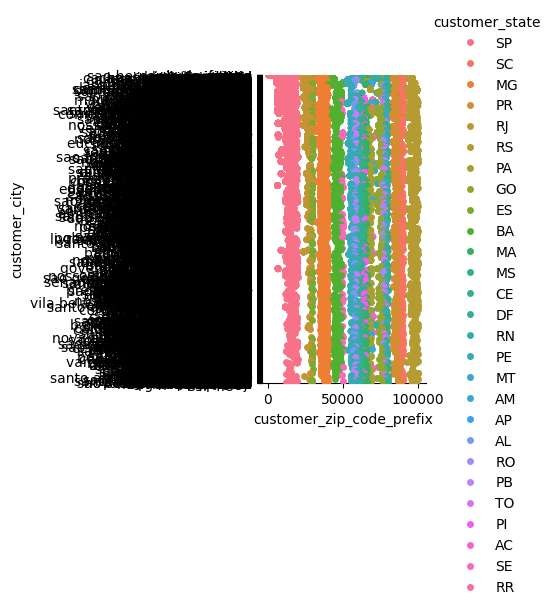

In [47]:
sns.catplot(x="customer_zip_code_prefix", y="customer_state", data=df_customers, hue="customer_state")

<Axes: >

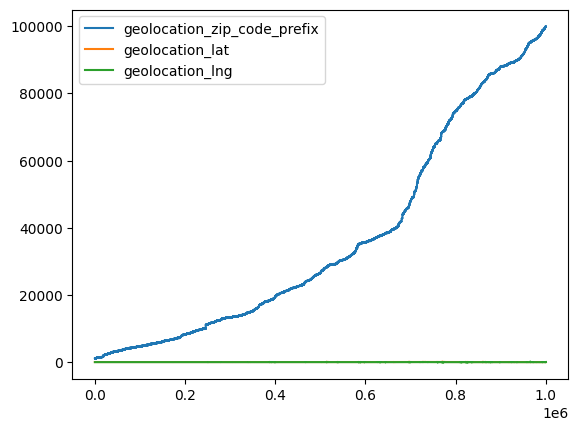

In [62]:
df_geolocation.plot()

In [63]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


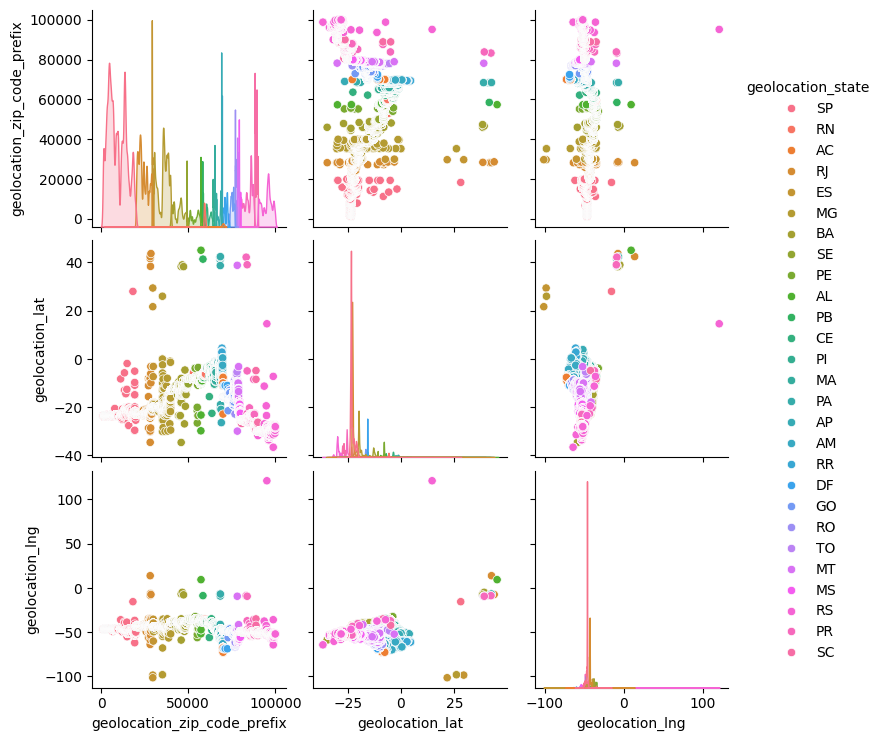

In [74]:
sns.pairplot(df_geolocation, hue='geolocation_state')

In [75]:
df_order_items.head()

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
order_id,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


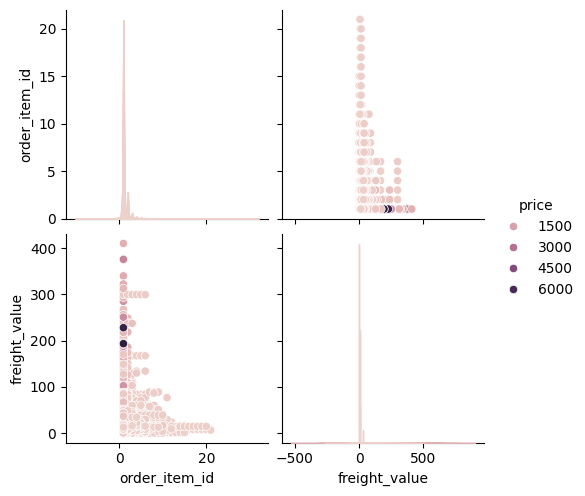

In [76]:
sns.pairplot(df_order_items, hue='price')

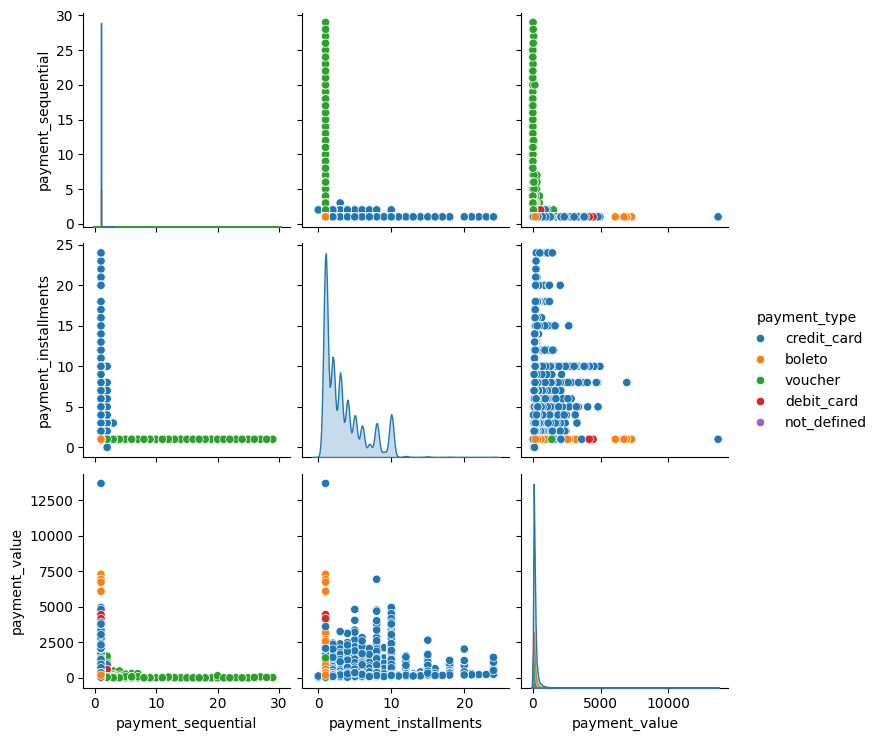

In [82]:
sns.pairplot(df_order_payments, hue="payment_type")

In [85]:
df_products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [88]:
df_products.drop(['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'])

KeyError: "['product_id', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'] not found in axis"

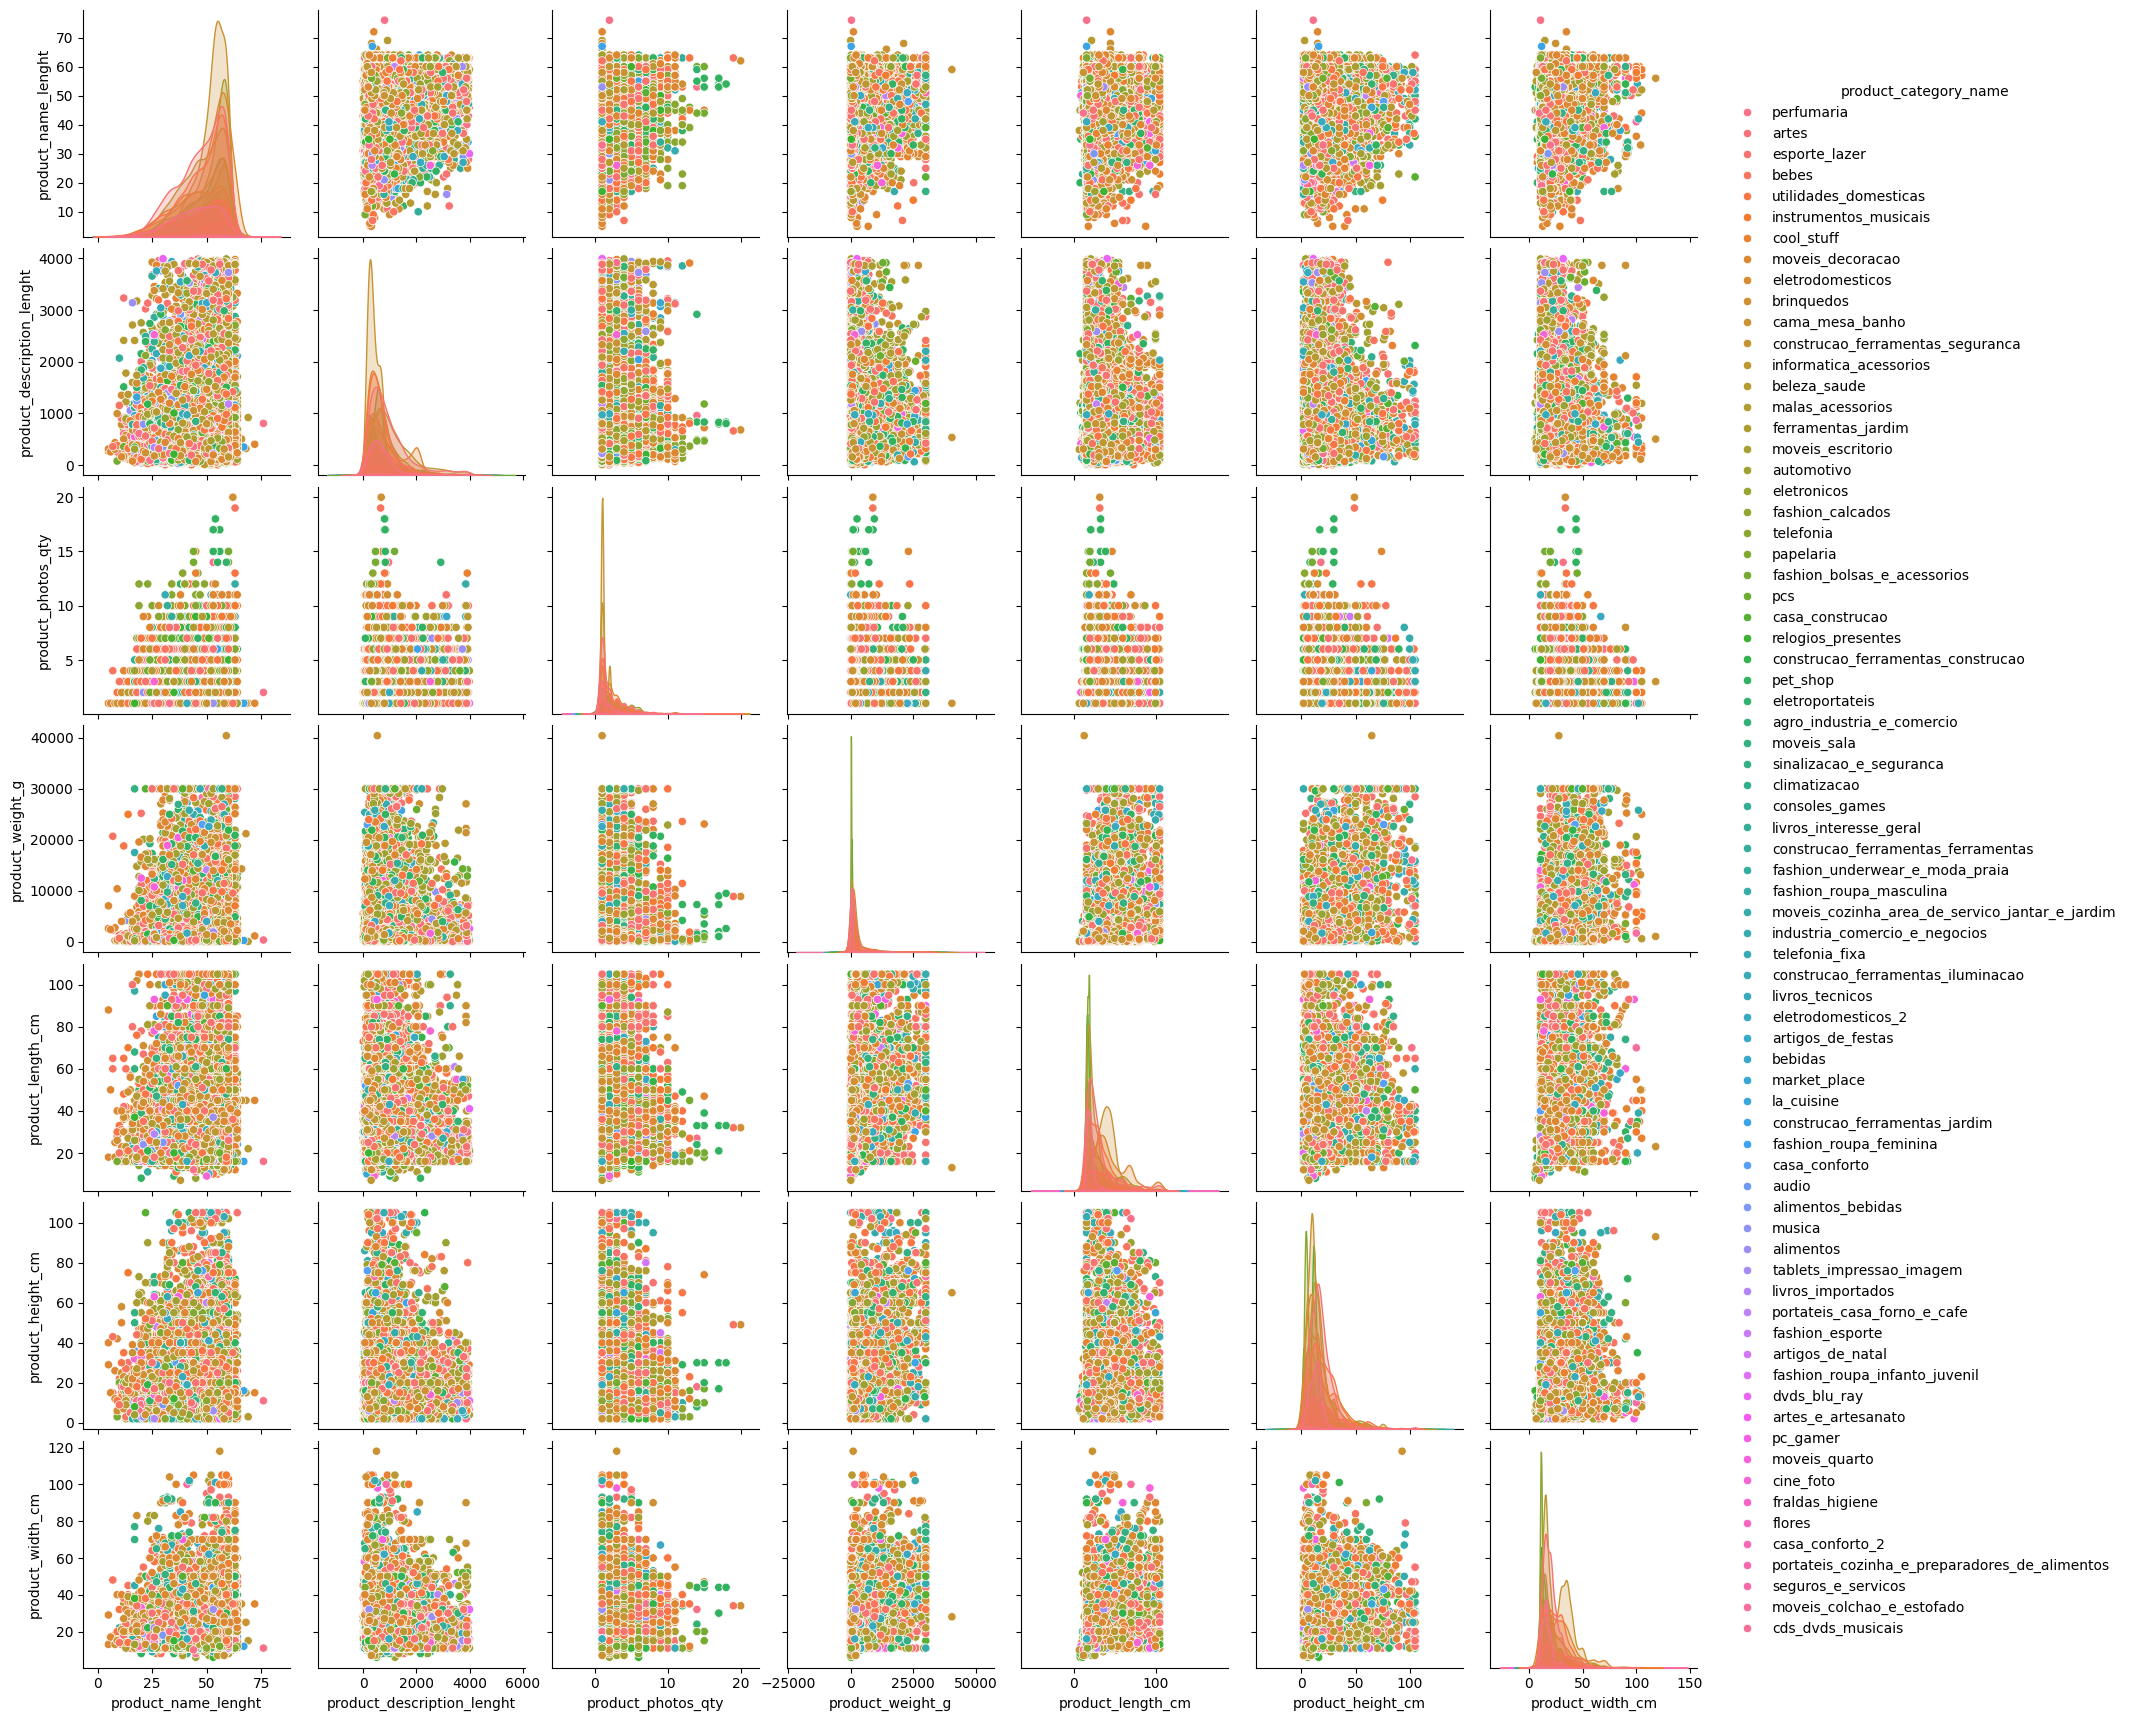

In [79]:
sns.pairplot(df_products, hue="product_category_name")

c:\Users\JoJo_\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


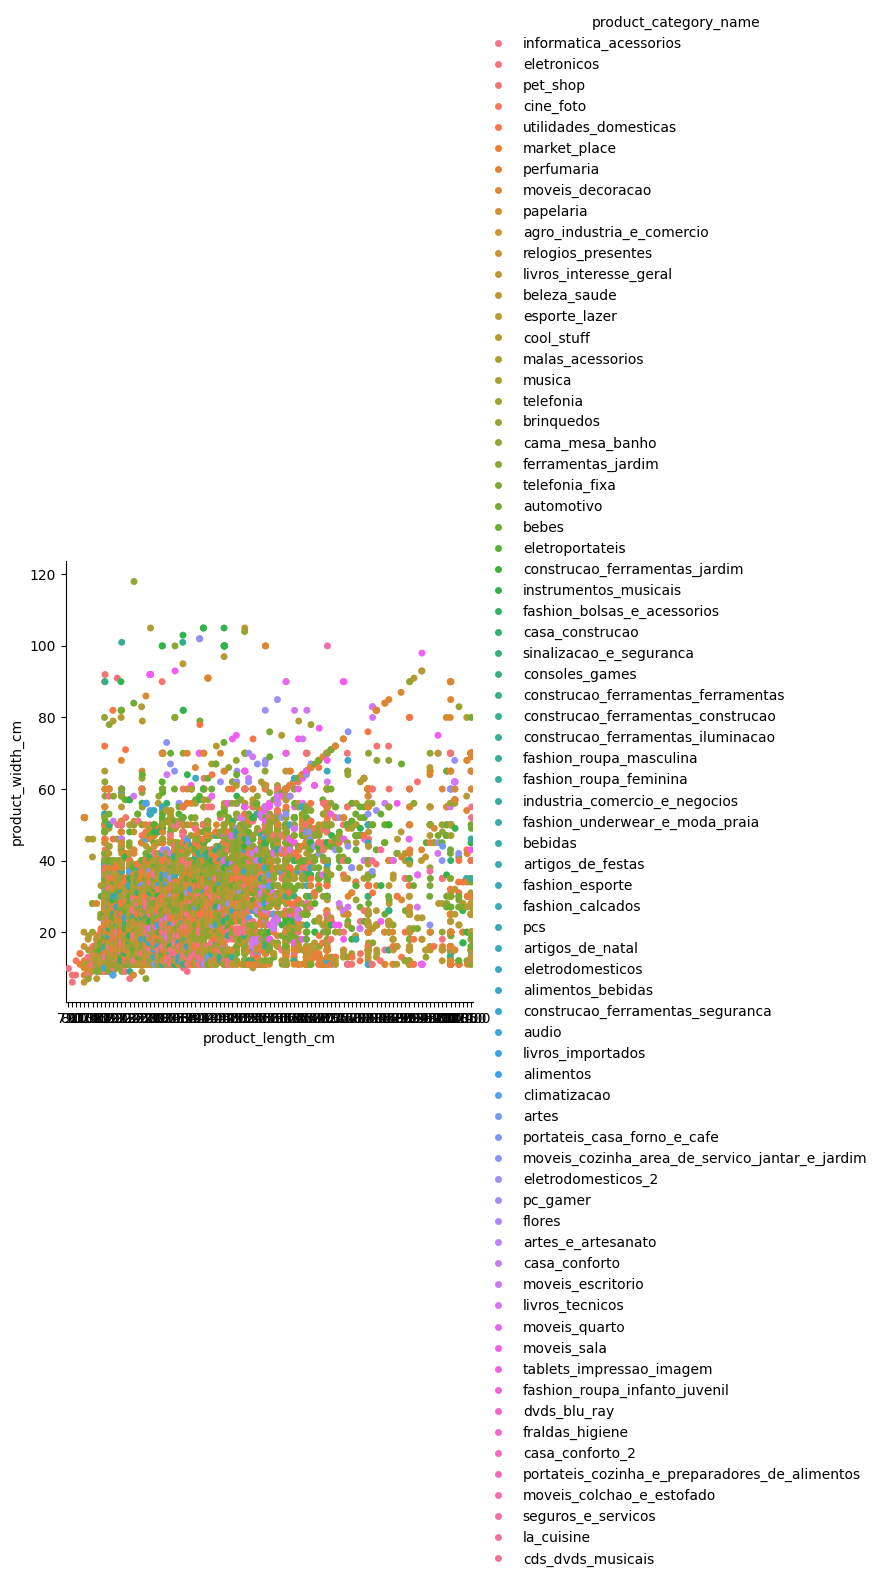

In [81]:
sns.catplot(x='product_length_cm', y='product_width_cm', data=df_products, hue='product_category_name')

In [83]:
sns.heatmap(df_products.corr())

ValueError: could not convert string to float: '1e9e8ef04dbcff4541ed26657ea517e5'